<a href="https://colab.research.google.com/github/k2tam/Android-NoteApp/blob/master/FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Đồ án cuối kỳ
# Môn: Xử lý dữ liệu lớn
# Học kỳ 1 - Năm học 2022-2023
# Giảng viên: Th.S. Nguyễn Thành An

# Cài đặt PySpark

In [3]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
# !cp drive/MyDrive/tmp/spark-3.1.1-bin-hadoop3.2.tgz .
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

In [4]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

import findspark
findspark.init()

# Yêu cầu

## Spark Context

In [5]:
from pyspark import SparkContext
from pyspark.sql import SQLContext

sc = SparkContext("local", 'CK')
sqlc = SQLContext(sc)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Property used to format output tables better
spark

## Câu 1: Giảm số chiều với SVD

In [8]:
dataFile = sc.textFile('/content/drive/MyDrive/BigData/Final/datasets/oxford_pet3_test.csv')

In [30]:
def preProcess(x):
  items = x.strip().split(',')
  index = items[0]
  type = items[1]
  img = items[2:]

  return (index,type,img)

rdd = dataFile \
  .map(preProcess)

df1 = rdd.toDF(["Index","Type","Img"])
df1.show()


+-----+----+--------------------+
|Index|Type|                 Img|
+-----+----+--------------------+
|    0|  19|[254, 246, 235, 2...|
|    1|  20|[3, 3, 1, 3, 3, 1...|
|    2|  28|[115, 128, 32, 89...|
|    3|  28|[182, 152, 116, 1...|
|    4|   4|[187, 191, 202, 1...|
|    5|  18|[86, 80, 66, 73, ...|
|    6|  22|[153, 70, 86, 155...|
|    7|  36|[207, 191, 178, 2...|
|    8|  18|[107, 97, 105, 10...|
|    9|  16|[117, 114, 104, 1...|
|   10|   3|[162, 180, 202, 1...|
|   11|  29|[53, 82, 24, 45, ...|
|   12|  18|[129, 205, 241, 1...|
|   13|  15|[69, 61, 57, 68, ...|
|   14|  10|[15, 12, 3, 53, 2...|
|   15|  31|[40, 20, 11, 38, ...|
|   16|   2|[192, 198, 187, 2...|
|   17|   6|[153, 148, 142, 1...|
|   18|  20|[25, 4, 1, 24, 3,...|
|   19|   2|[6, 4, 5, 6, 4, 5...|
+-----+----+--------------------+
only showing top 20 rows



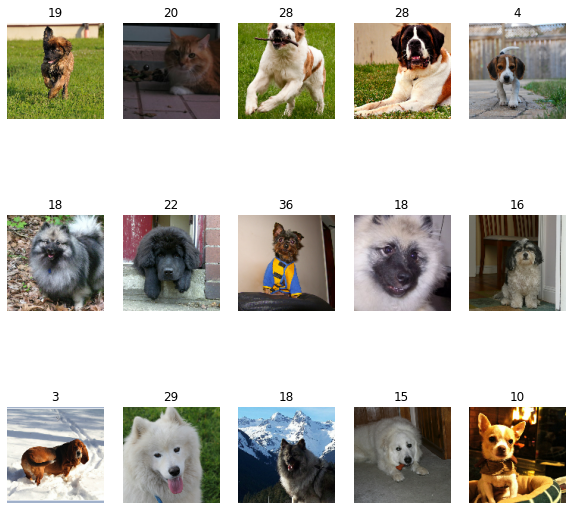

In [31]:
#Cau 1:
# i


import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

rows = df1.take(15)

# Create figure 3 x 15
fig = plt.figure(figsize=(10,10))

for row in rows:
  index = row[0]
  type = row[1]
  tempVec1D = row[2]
  vec1D = [int(i) for i in tempVec1D]
  tempArr = np.array(vec1D)
  vec3D = tempArr.reshape(128,128,3)

  fig.add_subplot(3, 5, int(index)+1)

  plt.title(type)
  plt.axis('off')
  plt.imshow(vec3D)

In [ ]:
#Cau 1:
# i


import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure


img_arr = df1['Img'].collect()
print(img_arr)





f = open("/content/drive/MyDrive/BigData/Final/datasets/oxford_pet3_train.csv")

img_arr=[]

# Create figure 3 x 15
fig = plt.figure(figsize=(10,10))

for _ in range(15):
  line = f.readline().strip()
  index = line.split(',')[0]
  type = line.split(',')[1]
  tempVec1D = line.split(',')[2:]
  vec1D = [int(i) for i in tempVec1D]
  tempArr = np.array(vec1D)
  vec3D = tempArr.reshape(128,128,3)

  fig.add_subplot(3, 5, int(index)+1)

  plt.title(str(type))
  plt.axis('off')
  plt.imshow(vec3D)



f.close()



In [ ]:
# ii
import random

# Get 5 r random value
r_arr = []
for _ in range(5):
  r_arr.append(random.randint(0, 49152))





[13182, 3700, 33875, 15029, 30515]


True

## Câu 2: Khuyến nghị sản phẩm với Collaborative Filtering

In [ ]:
f2 = open("/content/drive/MyDrive/BigData/Final/datasets/oxford_pet3_train.csv")


## Câu 3: Dự đoán giá chứng khoán

## Câu 4: Phân loại đa lớp với pyspark